In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import astropy.units as u
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.table import Table
import regions
from regions import Regions

In [2]:
cd ..

/home/savannahgramze/research/lactea-filament/lactea-filament


In [3]:
from jwst_plots import JWSTCatalog

In [4]:
basepath = '/home/savannahgramze/research/Research/JWST/cloudc/'

# Load Catalog

In [5]:
fn_405 = f'{basepath}/jw02221-o002_t001_nircam_clear-f405n-merged_i2d.fits'
ww = WCS(fits.open(fn_405)[1].header)
data = fits.open(fn_405)[1].data

Set DATE-AVG to '2023-04-20T10:07:44.724' from MJD-AVG.
Set DATE-END to '2023-04-25T05:06:53.406' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -3.177752 from OBSGEO-[XYZ].
Set OBSGEO-H to 1298809712.873 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [6]:
cat_fn = f'{basepath}/basic_merged_indivexp_photometry_tables_merged.fits'
basetable = Table.read(cat_fn)

In [7]:
base_jwstcatalog = JWSTCatalog(basetable)
mask_qf = base_jwstcatalog.get_qf_mask(0.4)
cat_use = JWSTCatalog(basetable[mask_qf])

# Prep Colors

In [8]:
color_187_405 = cat_use.color('F187N', 'F405N')
color_182_212 = cat_use.color('F182M', 'F212N')
color_212_410 = cat_use.color('F212N', 'F410M')
color_410_466 = cat_use.color('F410M', 'F466N')

In [9]:
data_0 = np.zeros_like(data)
data_0[data_0 == 0] = np.nan

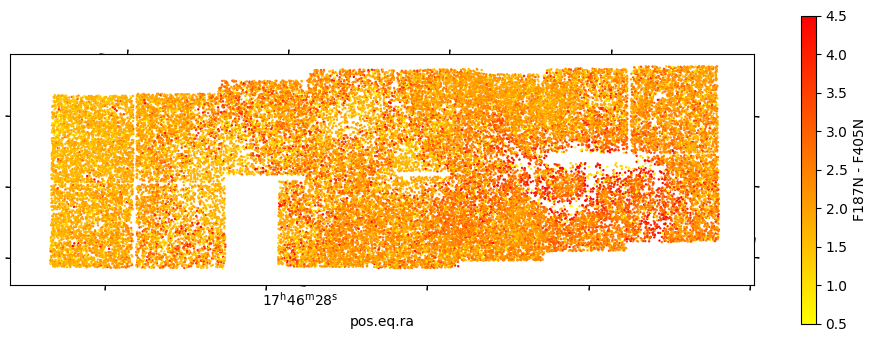

In [18]:
fig = plt.figure(figsize=(12, 4))
ax = plt.subplot(111, projection=ww)
ax.imshow(data_0, cmap='gray', origin='lower')
im = ax.scatter(cat_use.ra, cat_use.dec, c=color_187_405, s=0.5, cmap='autumn_r', transform=ax.get_transform('world'), vmin=0.5, vmax=4.5)
plt.colorbar(im, label='F187N - F405N')
plt.show()

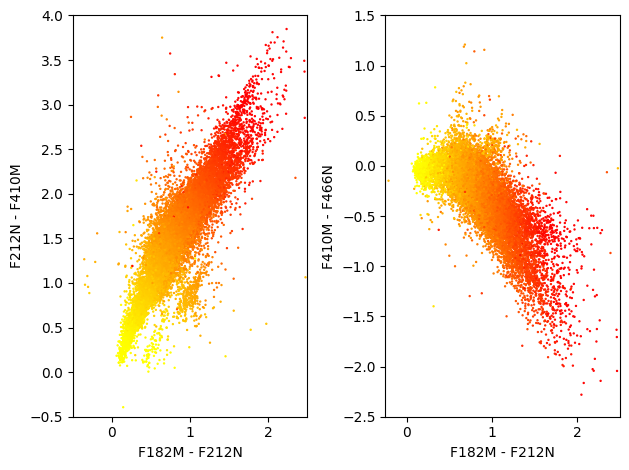

In [31]:
ax1 = plt.subplot(121)
cat_use.plot_CCD('F182M', 'F212N', 'F212N', 'F410M', c=color_187_405, ax=ax1, s=0.5, cmap='autumn_r', vmin=0.5, vmax=4.5)
ax1.set_xlim(-0.5, 2.5)
ax1.set_ylim(-0.5, 4)

ax2 = plt.subplot(122)
cat_use.plot_CCD('F182M', 'F212N', 'F410M', 'F466N', c=color_187_405, ax=ax2, s=0.5, cmap='autumn_r', vmin=0.5, vmax=4.5)
ax2.set_xlim(-0.25, 2.5)
ax2.set_ylim(-2.5, 1.5)

plt.tight_layout()
plt.show()

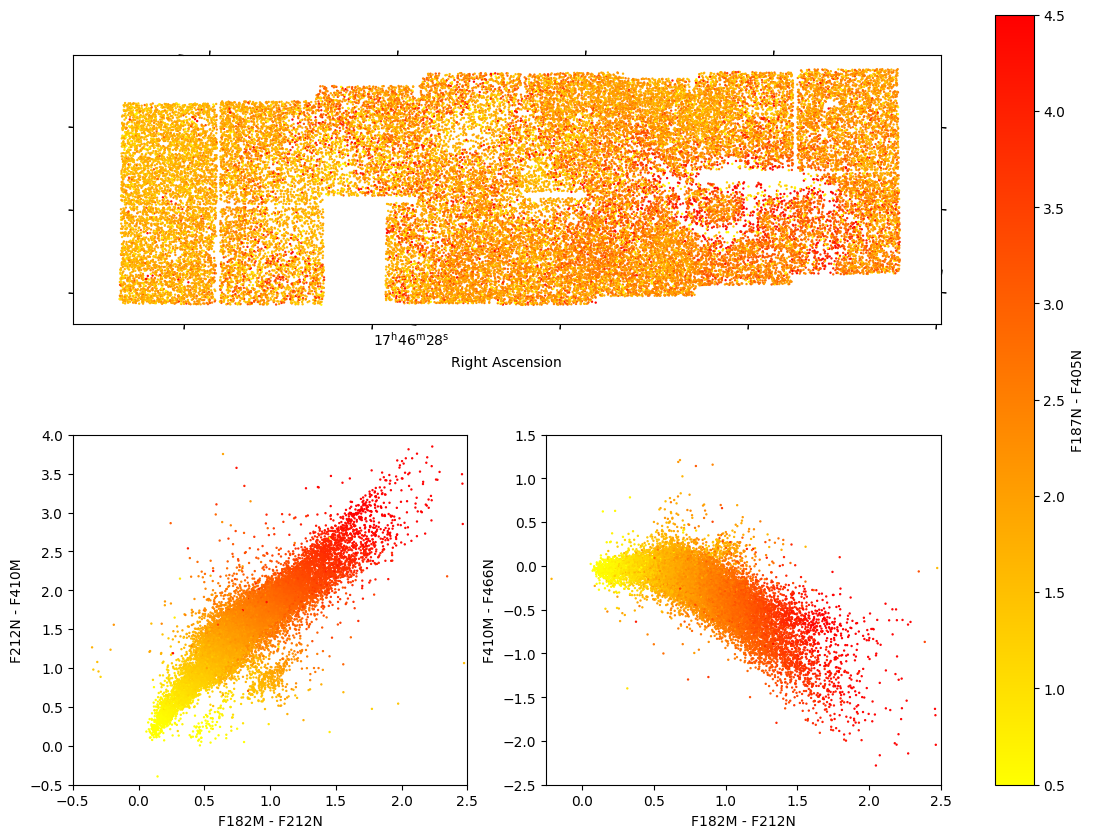

In [58]:
fig = plt.figure(figsize=(14, 10))

ax = fig.add_subplot(211, projection=ww)
ax.imshow(data_0, cmap='gray', origin='lower')
im = ax.scatter(cat_use.ra, cat_use.dec, c=color_187_405, s=0.5, cmap='autumn_r', transform=ax.get_transform('world'), vmin=0.5, vmax=4.5)
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')

ax1 = fig.add_subplot(223)
cat_use.plot_CCD('F182M', 'F212N', 'F212N', 'F410M', c=color_187_405, ax=ax1, s=0.5, cmap='autumn_r', vmin=0.5, vmax=4.5)
ax1.set_xlim(-0.5, 2.5)
ax1.set_ylim(-0.5, 4)

ax2 = fig.add_subplot(224)
cat_use.plot_CCD('F182M', 'F212N', 'F410M', 'F466N', c=color_187_405, ax=ax2, s=0.5, cmap='autumn_r', vmin=0.5, vmax=4.5)
ax2.set_xlim(-0.25, 2.5)
ax2.set_ylim(-2.5, 1.5)

plt.colorbar(im, label='F187N - F405N', ax=[ax, ax1, ax2])
#plt.tight_layout()

plt.show()